In [82]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Rows

In [5]:
Table(['Even', 'Odd'])

Even,Odd


In [6]:
Table(['Even', 'Odd']).with_row([2, 3])

Even,Odd
2,3


In [13]:
t = Table(['Even', 'Odd']).with_row([2, 3]).with_row([4, 5])
t

Even,Odd
2,3
4,5


In [14]:
t.with_row([6, 7])

Even,Odd
2,3
4,5
6,6


In [15]:
t

Even,Odd
2,3
4,5


In [18]:
t = t.with_row([4, 7])
t

Even,Odd
2,3
4,5
6,7
8,9


In [19]:
t.where('Even', 4)

Even,Odd
4,5


In [21]:
t.where(0, 4)

Even,Odd
4,5


In [23]:
t.where(1, are.not_above(5))

Even,Odd
2,3
4,5


In [25]:
t

Even,Odd
2,3
4,5
6,7
8,9


#### Discussion

In [34]:
nba = Table.read_table('nba_salaries.csv').drop('TEAM').relabeled(0, 'NAME').relabeled(2, 'SALARY')
nba

NAME,POSITION,SALARY
Paul Millsap,PF,18.6717
Al Horford,C,12
Tiago Splitter,C,9.75625
Jeff Teague,PG,8
Kyle Korver,SG,5.74648
Thabo Sefolosha,SF,4
Mike Scott,PF,3.33333
Kent Bazemore,SF,2
Dennis Schroder,PG,1.7634
Tim Hardaway Jr.,SG,1.30452


In [35]:
nba.where(1, 'PG').where(2, are.above(15)).column(0)

array(['Derrick Rose', 'Kyrie Irving',
       'Chris Paul', 'Russell Westbrook',
       'John Wall'], 
      dtype='<U24')

In [37]:
nba.with_row(['Samosa', 'Mascot', 100])
nba.where('NAME', are.containing('Samo'))

NAME,POSITION,SALARY


## Census

In [41]:
full = Table.read_table('NC-EST2014-AGESEX-RES.csv')
full

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014
0,0,3944153,3944160,3951330,3963071,3926665,3945610,3948350
0,1,3978070,3978090,3957888,3966510,3978006,3943077,3962123
0,2,4096929,4096939,4090862,3971573,3979952,3992690,3957772
0,3,4119040,4119051,4111920,4102501,3983049,3992425,4005190
0,4,4063170,4063186,4077552,4122303,4112638,3994047,4003448
0,5,4056858,4056872,4064653,4087713,4132210,4123408,4004858
0,6,4066381,4066412,4073013,4074979,4097780,4143094,4134352
0,7,4030579,4030594,4043047,4083240,4084964,4108615,4154000
0,8,4046486,4046497,4025604,4053206,4093213,4095827,4119524
0,9,4148353,4148369,4125415,4035769,4063193,4104133,4106832


In [42]:
partial = full.select(['SEX', 'AGE', 4, 8])
partial

SEX,AGE,POPESTIMATE2010,POPESTIMATE2014
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858
0,6,4073013,4134352
0,7,4043047,4154000
0,8,4025604,4119524
0,9,4125415,4106832


In [43]:
simple = partial.relabeled('POPESTIMATE2010', '2010').relabeled(3, '2014')
simple

SEX,AGE,2010,2014
0,0,3951330,3948350
0,1,3957888,3962123
0,2,4090862,3957772
0,3,4111920,4005190
0,4,4077552,4003448
0,5,4064653,4004858
0,6,4073013,4134352
0,7,4043047,4154000
0,8,4025604,4119524
0,9,4125415,4106832


In [56]:
census = simple.with_columns(
        'Change', simple.column(3) - simple.column(2), 
        'Growth', (simple.column(3) / simple.column(2)) ** (1/4) - 1)
census

SEX,AGE,2010,2014,Change,Growth
0,0,3951330,3948350,-2980,-0.000188597
0,1,3957888,3962123,4235,0.000267397
0,2,4090862,3957772,-133090,-0.00823453
0,3,4111920,4005190,-106730,-0.0065532
0,4,4077552,4003448,-74104,-0.00457471
0,5,4064653,4004858,-59795,-0.00369821
0,6,4073013,4134352,61339,0.00374389
0,7,4043047,4154000,110953,0.00679123
0,8,4025604,4119524,93920,0.00578232
0,9,4125415,4106832,-18583,-0.00112804


In [57]:
census.set_format('Growth', PercentFormatter)
census.set_format([2, 3, 4], NumberFormatter)

SEX,AGE,2010,2014,Change,Growth
0,0,"3,951,330","3,948,350","-2,980",-0.02%
0,1,"3,957,888","3,962,123","4,235",0.03%
0,2,"4,090,862","3,957,772","-133,090",-0.82%
0,3,"4,111,920","4,005,190","-106,730",-0.66%
0,4,"4,077,552","4,003,448","-74,104",-0.46%
0,5,"4,064,653","4,004,858","-59,795",-0.37%
0,6,"4,073,013","4,134,352","61,339",0.37%
0,7,"4,043,047","4,154,000","110,953",0.68%
0,8,"4,025,604","4,119,524","93,920",0.58%
0,9,"4,125,415","4,106,832","-18,583",-0.11%


In [90]:
census.where('AGE', 999)

SEX,AGE,2010,2014,Change,Growth
0,999,"309,347,057","318,857,056","9,509,999",0.76%
1,999,"152,089,484","156,936,487","4,847,003",0.79%
2,999,"157,257,573","161,920,569","4,662,996",0.73%


In [91]:
males = census.where('SEX', 1).where('AGE', are.below(999))
females = census.where('SEX', 2).where('AGE', are.below(999))

In [92]:
females.sort('2014', descending=True).show(5)

SEX,AGE,2010,2014,Change,Growth
2,54,"2,196,798","2,331,961","135,163",1.50%
2,53,"2,268,457","2,316,131","47,674",0.52%
2,24,"2,082,209","2,301,237","219,028",2.53%
2,23,"2,066,126","2,298,701","232,575",2.70%
2,51,"2,289,164","2,283,261","-5,903",-0.06%


In [93]:
males.sort('2014', descending=True).show(5)

SEX,AGE,2010,2014,Change,Growth
1,23,"2,151,095","2,399,883","248,788",2.77%
1,24,"2,161,380","2,391,398","230,018",2.56%
1,22,"2,188,228","2,367,842","179,614",1.99%
1,21,"2,241,095","2,310,734","69,639",0.77%
1,25,"2,177,171","2,295,836","118,665",1.34%


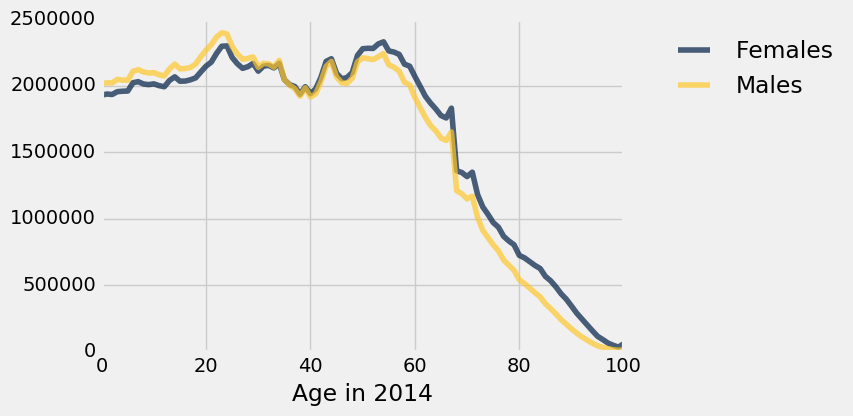

In [106]:
Table().with_columns(
    'Age in 2014', females.column('AGE'),
    'Females', females.column('2014'),
    'Males', males.column('2014'),
).plot('Age in 2014')

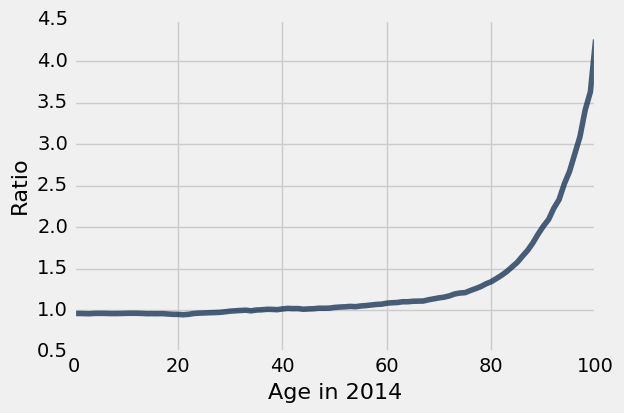

In [107]:
Table().with_columns(
    'Age in 2014', females.column('AGE'),
    'Ratio', females.column('2014') / males.column('2014'),
).plot('Age in 2014')

In [85]:
females.where('Change', are.above(350000)).sort('AGE').show()

SEX,AGE,2010,2014,Change,Growth
2,64,"1,414,220","1,826,662","412,442",6.61%
2,65,"1,405,839","1,776,761","370,922",6.03%
2,66,"1,381,541","1,758,649","377,108",6.22%
2,67,"1,423,561","1,832,245","408,684",6.51%
2,999,"157,257,573","161,920,569","4,662,996",0.73%


In [108]:
females.where('AGE', are.between(55, 70)).show()

SEX,AGE,2010,2014,Change,Growth
2,55,"2,183,762","2,263,367","79,605",0.90%
2,56,"2,108,681","2,254,749","146,068",1.69%
2,57,"2,036,520","2,237,030","200,510",2.38%
2,58,"1,963,764","2,163,798","200,034",2.45%
2,59,"1,914,772","2,148,517","233,745",2.92%
2,60,"1,874,501","2,071,358","196,857",2.53%
2,61,"1,828,708","1,997,348","168,640",2.23%
2,62,"1,815,999","1,922,318","106,319",1.43%
2,63,"1,898,260","1,870,552","-27,708",-0.37%
2,64,"1,414,220","1,826,662","412,442",6.61%


In [100]:
2014 - make_array(67, 66, 65, 64)

array([1947, 1948, 1949, 1950])